# XGBoost:

XGBoost stands for eXtreme Gradient Boosting. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.

### Key Concepts

1. Gradient Boosting: A machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

2. Decision Trees: A flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

3. Boosting: A sequential technique where each model tries to correct the errors of the previous model. Models are added sequentially until no further improvements can be made.

4. Regularization: XGBoost includes regularization terms in the objective function to control overfitting.

### Pseudo Code for XGBoost

1. Initialize the model with a constant value:

        For regression, this is usually the mean of the target values.

        For classification, this is usually the log(odds) of the target class.

2. For each iteration (tree):

        Compute the residuals (difference between the observed and predicted values).

        Fit a decision tree to the residuals.

        Update the predictions by adding the predictions from the new tree (scaled by a learning rate).

3. Repeat until the number of iterations (trees) is reached or the residuals are minimized.

In [4]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [5]:
class XGBoost:
    def __init__(self, n_estimators=100, lr=0.01, max_depth=3):
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_depth = max_depth
        self.trees = []
        self.base_prediction = None 

    def fit(self, X, y):
        # Initialize predictions with the mean of y 
        self.base_prediction = np.mean(y)
        predictions = np.full_like(y, self.base_prediction, dtype=np.float64)

        for _ in range(self.n_estimators):
            # compute residuals 
            residuals = y - predictions 

            # fit a decision tree to the residual 
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # update predictions 
            predictions += self.lr * tree.predict(X)

            # save the tree 
            self.trees.append(tree)

    def predict(self, X):
        # start with the base prediction 
        predictions = np.full(X.shape[0], self.base_prediction, dtype=np.float64)

        # add predictions from each tree
        for tree in self.trees:
            predictions += self.lr * tree.predict(X)

        return predictions

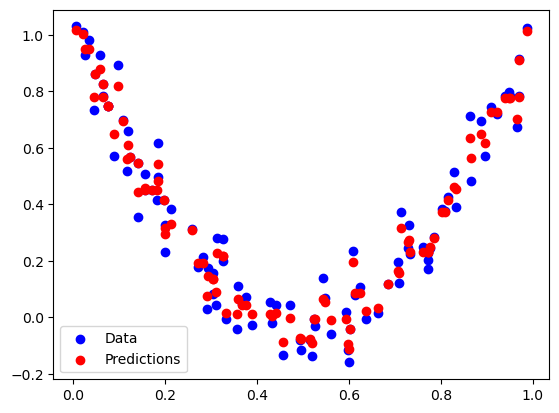

In [7]:
# Generate some sample data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 * (X - 0.5) ** 2
y = y.ravel() + np.random.normal(0, 0.1, 100)

# Initialize and fit the model
model = XGBoost(n_estimators=100, lr=0.1, max_depth=3)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X, y_pred, color='red', label='Predictions')
plt.legend()
plt.show()